# Import and variables

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from acropole import trajectory
import joblib


__COL_SYST_TRAJ_ID = "SYST_TRAJ_ID"
__COL_SYST_POINT_ID = "SYST_POINT_ID"
__COL_PLOT_DATE = "PLOT_DATE"
__COL_FLIGHT_TIME = "FLIGHT_TIME"
__COL_TIME_LAST_PLOT = "TIME_LAST_PLOT"
__COL_ALTI_STD_FT = "ALTI_STD_FT"
__COL_GRND_SPD_KT = "GRND_SPD_KT"
__COL_VERT_SPD_FTMN = "VERT_SPD_FTMN"
__COL_MASS_KG = "MASS_KG"
__COL_TRUE_AIR_SPD_KT = "TRUE_AIR_SPD_KT"
__COL_FUEL_FLOW_KGH = "FUEL_FLOW_KGH"
__COL_FLPL_AIRC_TYPE = "FLPL_AIRC_TYPE"
__COL_ESTIM_FUEL_FLOW_ACRPL = "ESTIM_FUEL_FLOW_ACRPL"
__COL_ESTIM_FUEL_FLOW_KGH = "ESTIM_FUEL_FLOW_KGH"
__COL_ESTIM_CONSO_KG = "ESTIM_CONSO_KG"


cols_smooth = [
    __COL_ALTI_STD_FT,
    __COL_GRND_SPD_KT,
    __COL_VERT_SPD_FTMN,
    __COL_TRUE_AIR_SPD_KT
]

cols_resample = [
    __COL_ALTI_STD_FT,
    __COL_GRND_SPD_KT,
    __COL_VERT_SPD_FTMN,
    __COL_TRUE_AIR_SPD_KT,
    __COL_MASS_KG,
    __COL_FUEL_FLOW_KGH
]

cols_keep = [
    __COL_SYST_TRAJ_ID,
    __COL_FLPL_AIRC_TYPE
]

cols_out = [
    __COL_SYST_TRAJ_ID, 
    __COL_SYST_POINT_ID, 
    __COL_FLPL_AIRC_TYPE, 
    __COL_PLOT_DATE, 
    __COL_FLIGHT_TIME, 
    __COL_TIME_LAST_PLOT,
    __COL_ALTI_STD_FT, 
    __COL_GRND_SPD_KT, 
    __COL_VERT_SPD_FTMN, 
    __COL_TRUE_AIR_SPD_KT, 
    __COL_MASS_KG, 
    __COL_FUEL_FLOW_KGH,
    __COL_ESTIM_FUEL_FLOW_ACRPL, 
    __COL_ESTIM_FUEL_FLOW_KGH, 
    __COL_ESTIM_CONSO_KG
]

# Loading data sample
Here a complete flight with taxi is loaded

In [2]:
df = pd.read_csv("example_flight.csv")
df

,SYST_TRAJ_ID,FLPL_AIRC_TYPE,PLOT_DATE,FLIGHT_TIME,TIME_LAST_PLOT,ALTI_STD_FT,GRND_SPD_KT,VERT_SPD_FTMN,TRUE_AIR_SPD_KT,MASS_KG,FUEL_FLOW_KGH
0,ACPL0000,A320,2023-03-29 16:12:00,0.0,0.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000
1,ACPL0000,A320,2023-03-29 16:12:01,1.0,1.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000
2,ACPL0000,A320,2023-03-29 16:12:02,2.0,1.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000
3,ACPL0000,A320,2023-03-29 16:12:03,3.0,1.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000
4,ACPL0000,A320,2023-03-29 16:12:04,4.0,1.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
7791,ACPL0000,A320,2023-03-29 18:21:51,7791.0,1.0,-8.0,1.000000,0.0,1.000000,63970.609707,348.358818
7792,ACPL0000,A320,2023-03-29 18:21:52,7792.0,1.0,-8.0,1.355469,0.0,1.355469,63969.688347,251.743677
7793,ACPL0000,A320,2023-03-29 18:21:53,7793.0,1.0,-8.0,2.000000,0.0,2.000000,63960.616497,0.000000
7794,ACPL0000,A320,2023-03-29 18:21:54,7794.0,1.0,-8.0,2.000000,0.0,2.000000,63961.537857,0.000000


# Illustrating speed and altitude parameters

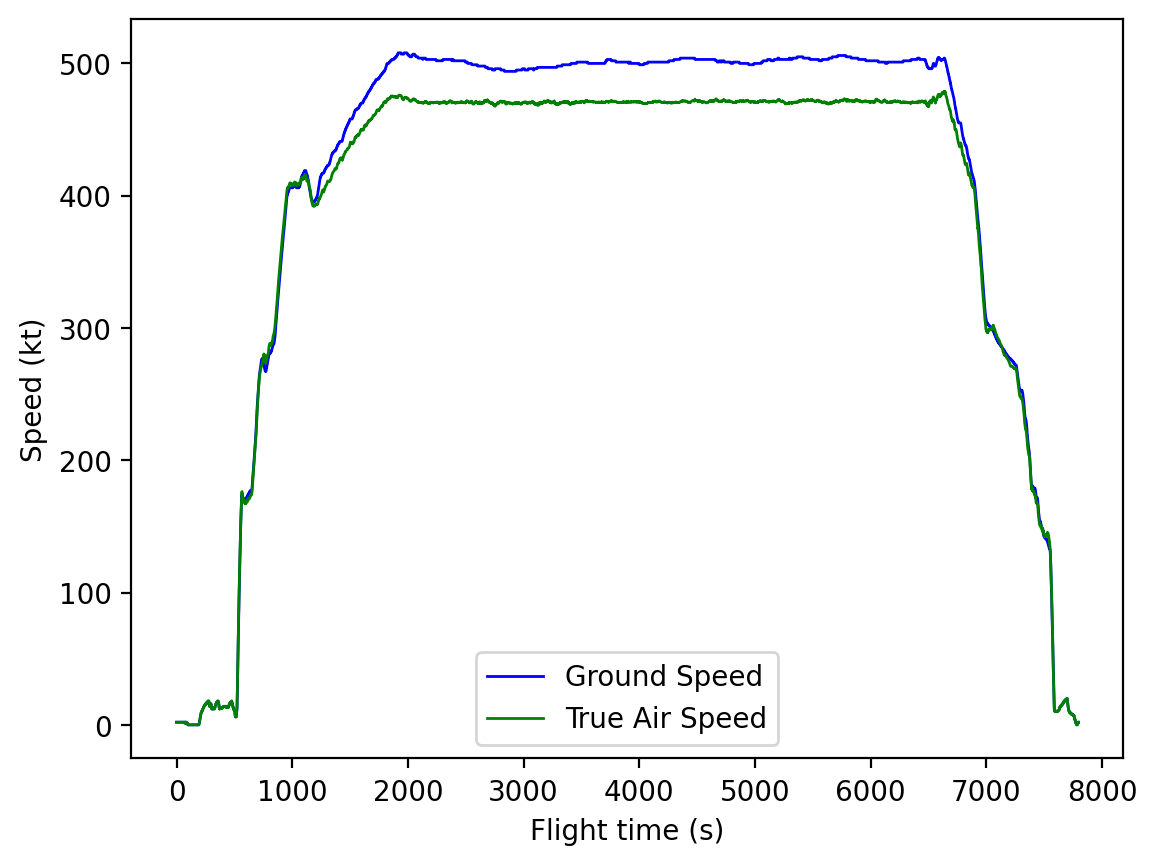

In [3]:
plt.figure(dpi=200)
plt.plot(df[__COL_FLIGHT_TIME], df[__COL_GRND_SPD_KT], color='b',lw=1,label="Ground Speed")
plt.plot(df[__COL_FLIGHT_TIME], df[__COL_TRUE_AIR_SPD_KT], color='g',lw=1,label="True Air Speed")
plt.legend()
plt.xlabel("Flight time (s)")
plt.ylabel("Speed (kt)")
plt.show()

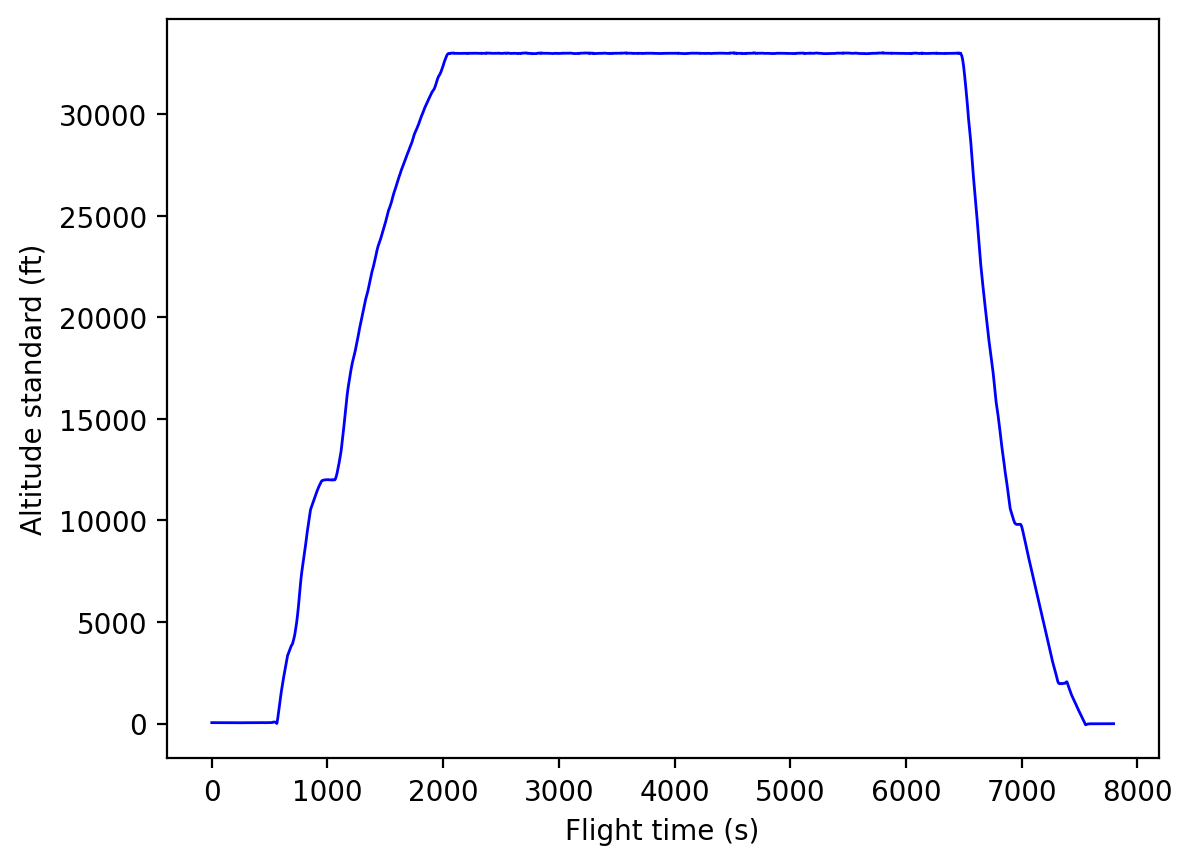

In [4]:
plt.figure(dpi=200)
plt.plot(df[__COL_FLIGHT_TIME], df[__COL_ALTI_STD_FT], color='b',lw=1)
plt.xlabel("Flight time (s)")
plt.ylabel("Altitude standard (ft)")
plt.show()

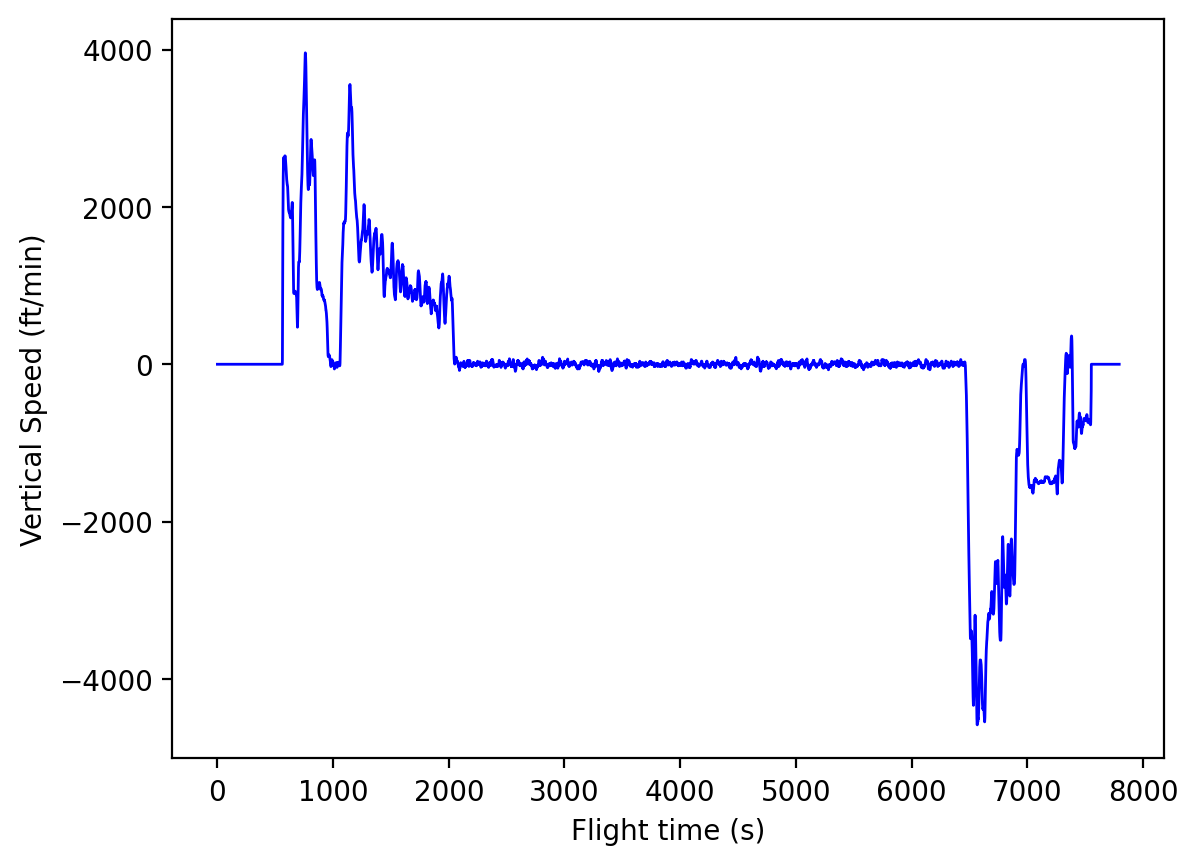

In [5]:
plt.figure(dpi=200)
plt.plot(df[__COL_FLIGHT_TIME], df[__COL_VERT_SPD_FTMN], color='b',lw=1)
plt.xlabel("Flight time (s)")
plt.ylabel("Vertical Speed (ft/min)")
plt.show()

# Example of prediction without TAS and Mass
Full pipeline is applied with 4s resampling but no smoothing

2023-04-04 13:25:31.839765: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


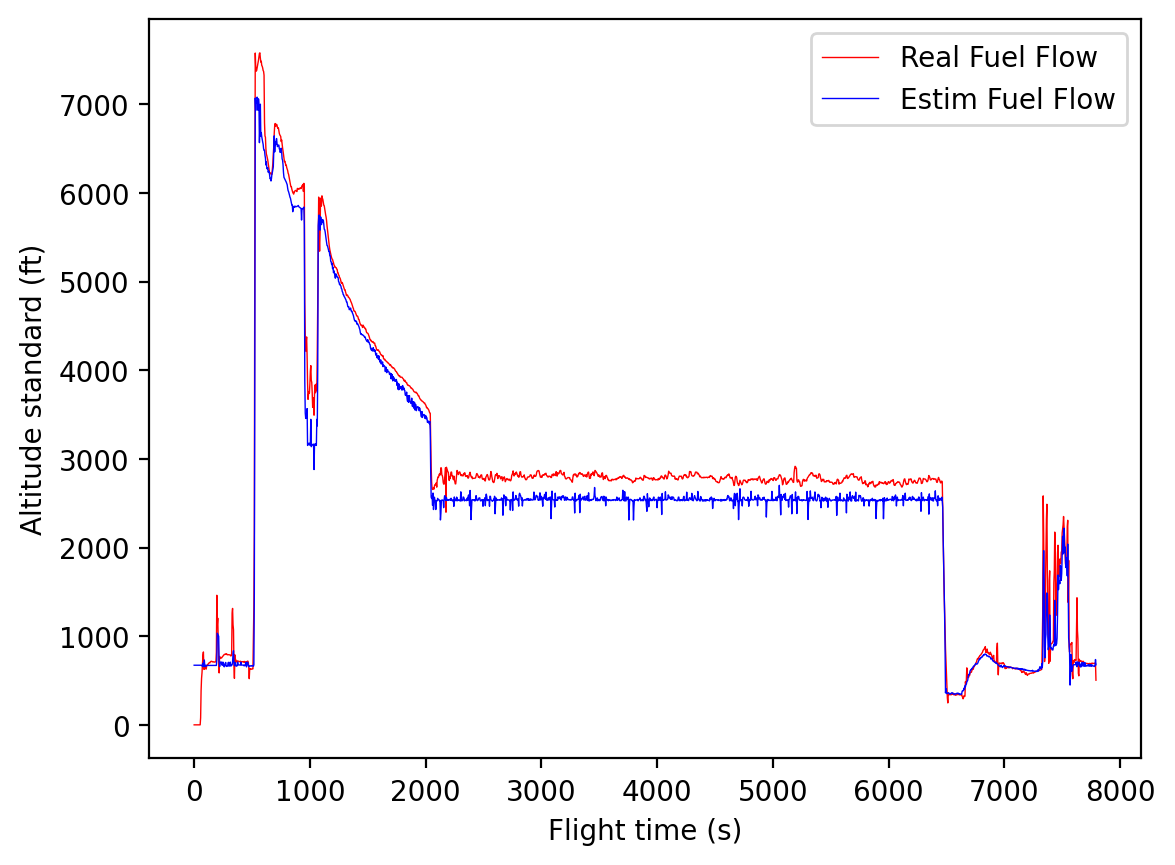

In [6]:
plt.figure(dpi=200)
df2 = trajectory.trajectory_process(df, cols_keep=cols_keep, cols_smooth=cols_smooth, cols_resample=cols_resample)
plt.plot(df2[__COL_FLIGHT_TIME], 2*df2[__COL_FUEL_FLOW_KGH], color='r',lw=0.5, label="Real Fuel Flow")
plt.plot(df2[__COL_FLIGHT_TIME], df2[__COL_ESTIM_FUEL_FLOW_KGH], color='b',lw=0.5, label="Estim Fuel Flow")
plt.xlabel("Flight time (s)")
plt.ylabel("Altitude standard (ft)")
plt.legend()
plt.show()

# Example of prediction with TAS and without Mass
Full pipeline is applied with 4s resampling but no smoothing

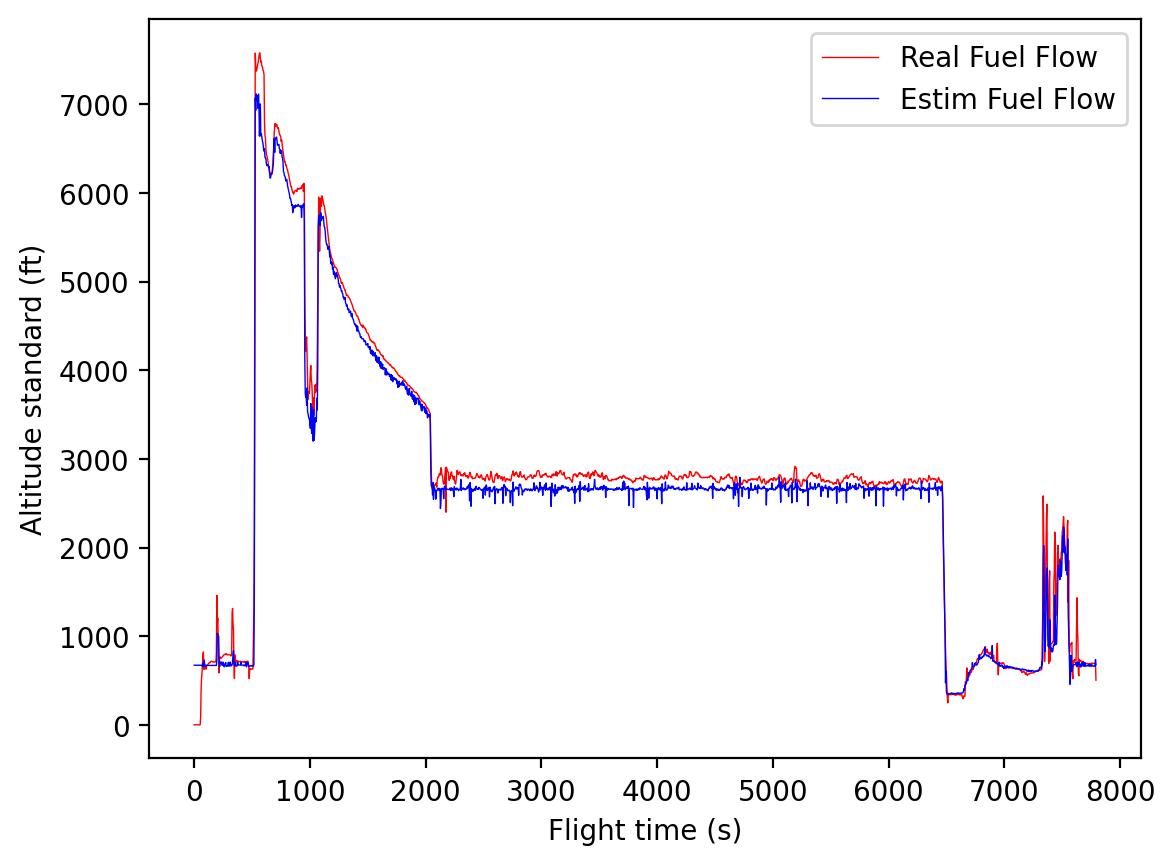

In [7]:
plt.figure(dpi=200)
df2 = trajectory.trajectory_process(df, tas=__COL_TRUE_AIR_SPD_KT, 
                                    cols_keep=cols_keep, cols_smooth=cols_smooth, cols_resample=cols_resample)
plt.plot(df2[__COL_FLIGHT_TIME], 2*df2[__COL_FUEL_FLOW_KGH], color='r',lw=0.5, label="Real Fuel Flow")
plt.plot(df2[__COL_FLIGHT_TIME], df2[__COL_ESTIM_FUEL_FLOW_KGH], color='b',lw=0.5, label="Estim Fuel Flow")
plt.xlabel("Flight time (s)")
plt.ylabel("Altitude standard (ft)")
plt.legend()
plt.show()

# Example of prediction with TAS and Mass
Full pipeline is applied with 4s resampling but no smoothing

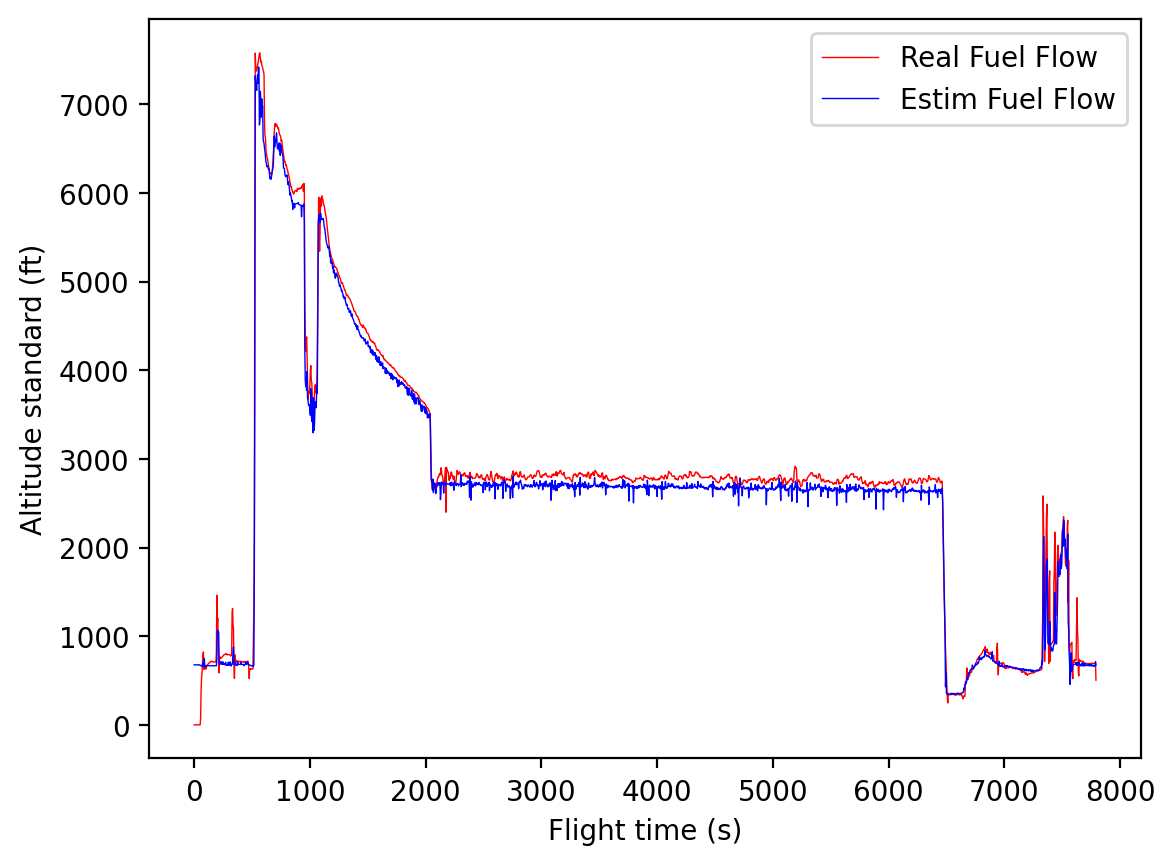

,SYST_TRAJ_ID,SYST_POINT_ID,FLPL_AIRC_TYPE,PLOT_DATE,FLIGHT_TIME,TIME_LAST_PLOT,ALTI_STD_FT,GRND_SPD_KT,VERT_SPD_FTMN,TRUE_AIR_SPD_KT,MASS_KG,FUEL_FLOW_KGH,ESTIM_FUEL_FLOW_ACRPL,ESTIM_FUEL_FLOW_KGH,ESTIM_CONSO_KG
0,ACPL0000,1,A320,2023-03-29 16:12:00,0.0,0.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000,0.083059,676.963389,0.000000
1,ACPL0000,2,A320,2023-03-29 16:12:04,4.0,4.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000,0.083059,676.963389,0.752182
2,ACPL0000,3,A320,2023-03-29 16:12:08,8.0,4.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000,0.083059,676.963389,0.752182
3,ACPL0000,4,A320,2023-03-29 16:12:12,12.0,4.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000,0.083059,676.963389,0.752182
4,ACPL0000,5,A320,2023-03-29 16:12:16,16.0,4.0,44.0,2.000000,0.0,2.000000,58477.143959,0.000000,0.083059,676.963389,0.752182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,ACPL0000,1945,A320,2023-03-29 18:21:36,7776.0,4.0,-8.0,1.000000,0.0,1.000000,63969.688347,346.544449,0.081251,662.229024,0.735810
1945,ACPL0000,1946,A320,2023-03-29 18:21:40,7780.0,4.0,-8.0,0.000000,0.0,0.000000,63969.688347,348.358818,0.081145,661.362171,0.734847
1946,ACPL0000,1947,A320,2023-03-29 18:21:44,7784.0,4.0,-8.0,0.000000,0.0,0.000000,63969.688347,347.047653,0.082402,671.612526,0.746236
1947,ACPL0000,1948,A320,2023-03-29 18:21:48,7788.0,4.0,-8.0,1.000000,0.0,1.000000,63969.688347,347.855614,0.087558,713.630001,0.792922


In [8]:
plt.figure(dpi=200)
df2 = trajectory.trajectory_process(df, tas=__COL_TRUE_AIR_SPD_KT, mass_kg=__COL_MASS_KG,
                                    cols_keep=cols_keep, cols_smooth=cols_smooth, cols_resample=cols_resample)
df2 = df2[cols_out]
plt.plot(df2[__COL_FLIGHT_TIME], 2*df2[__COL_FUEL_FLOW_KGH], color='r',lw=0.5, label="Real Fuel Flow")
plt.plot(df2[__COL_FLIGHT_TIME], df2[__COL_ESTIM_FUEL_FLOW_KGH], color='b',lw=0.5, label="Estim Fuel Flow")
plt.xlabel("Flight time (s)")
plt.ylabel("Altitude standard (ft)")
plt.legend()
plt.show()
df2